In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
unemp = pd.read_csv("../data/Econ/EconOriginal/unemp.csv")
unemp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1958,5.8,6.4,6.7,7.4,7.4,7.3,7.5,7.4,7.1,6.7,6.2,6.2
1,1959,6.0,5.9,5.6,5.2,5.1,5.0,5.1,5.2,5.5,5.7,5.8,5.3
2,1960,5.2,4.8,5.4,5.2,5.1,5.4,5.5,5.6,5.5,6.1,6.1,6.6
3,1961,6.6,6.9,6.9,7.0,7.1,6.9,7.0,6.6,6.7,6.5,6.1,6.0
4,1962,5.8,5.5,5.6,5.6,5.5,5.5,5.4,5.7,5.6,5.4,5.7,5.5


In [25]:
unemp_rate = list()
unemp_time = list()
for i in range(unemp.shape[0]):
    curr = unemp.loc[i]
    unemp_rate += curr.tolist()[1:]
    unemp_time += [int(curr.Year) + (i+1) / 12 for i in range(len(curr) - 1)]

In [26]:
unemp = pd.DataFrame()
unemp["MonthID"] = unemp_time
unemp["Unemp"] = unemp_rate
unemp = unemp.dropna()

In [27]:
f1 = open("../data/Econ/EconOriginal/fnames.txt", 'r')
fnames = [i.strip() for i in f1.readlines()]
f1.close()

In [28]:
dname = [i.split(".csv")[0] for i in fnames]
dname

['Food&Beverage', 'GDP', 'Income', 'LoanRate', 'Meat', 'MedicalCare']

In [29]:
ds = [pd.read_csv("../data/Econ/EconOriginal/{}".format(i)) for i in fnames]

In [30]:
for i in range(len(fnames)):
    ds[i]["DATE"] = pd.to_datetime(ds[i]["DATE"])
    ds[i].columns = ["DATE",dname[i]]
    ds[i]["MonthID"] = [i.year + i.month / 12 for i in ds[i]["DATE"]]
    ds[i][dname[i]] = [i if i != '.' else np.nan for i in ds[i][dname[i]]]
    ds[i][dname[i]] = ds[i][dname[i]].astype("float64")

In [31]:
ds.append(unemp)
dname.append("Unemp")

In [32]:
start_date = sorted([(dname[i], min(ds[i]["MonthID"])) for i in range(len(ds))], key = lambda x: x[1])
start_date

[('GDP', 1947.0833333333333),
 ('MedicalCare', 1947.0833333333333),
 ('Unemp', 1958.0833333333333),
 ('Income', 1959.0833333333333),
 ('Food&Beverage', 1967.0833333333333),
 ('Meat', 1967.0833333333333),
 ('LoanRate', 1972.1666666666667)]

In [33]:
end_date = sorted([(dname[i], max(ds[i]["MonthID"])) for i in range(len(ds))], key = lambda x: x[1], reverse=True)
end_date

[('Food&Beverage', 2019.3333333333333),
 ('Meat', 2019.3333333333333),
 ('MedicalCare', 2019.3333333333333),
 ('Income', 2019.25),
 ('Unemp', 2019.25),
 ('LoanRate', 2019.1666666666667),
 ('GDP', 2019.0833333333333)]

In [34]:
econ_master = ds[0]

In [35]:
for i in range(1, len(ds)):
    econ_master = econ_master.merge(ds[i][[i for i in ds[i].columns if i != 'DATE']], left_on = "MonthID", right_on = "MonthID", how="left")

In [36]:
econ_master.columns

Index(['DATE', 'Food&Beverage', 'MonthID', 'GDP', 'Income', 'LoanRate', 'Meat',
       'MedicalCare', 'Unemp'],
      dtype='object')

In [37]:
econ_master.head()

,DATE,Food&Beverage,MonthID,GDP,Income,LoanRate,Meat,MedicalCare,Unemp
0,1967-01-01,34.8,1967.083333,4535.591,3164.0,NaN,38.1,27.4,3.9
1,1967-02-01,34.7,1967.166667,NaN,3170.2,NaN,38.0,27.5,3.8
2,1967-03-01,34.7,1967.250000,NaN,3194.0,NaN,37.8,27.6,3.8
3,1967-04-01,34.6,1967.333333,4538.370,3193.0,NaN,37.5,27.8,3.8
4,1967-05-01,34.6,1967.416667,NaN,3199.5,NaN,37.4,27.9,3.8


In [38]:
econ_master.to_csv("../data/Econ/EconOriginal/econ_master.csv")

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

In [40]:
def detrender(econ, time):
    reg = LinearRegression().fit(np.reshape(time.tolist(), (-1, 1)), econ)
#     return reg.predict(np.reshape(time.tolist(), (-1, 1)))
    return [i-j for i, j in zip(econ, reg.predict(np.reshape(time.tolist(), (-1, 1))))]

In [41]:
econ_master.head()

,DATE,Food&Beverage,MonthID,GDP,Income,LoanRate,Meat,MedicalCare,Unemp
0,1967-01-01,34.8,1967.083333,4535.591,3164.0,NaN,38.1,27.4,3.9
1,1967-02-01,34.7,1967.166667,NaN,3170.2,NaN,38.0,27.5,3.8
2,1967-03-01,34.7,1967.250000,NaN,3194.0,NaN,37.8,27.6,3.8
3,1967-04-01,34.6,1967.333333,4538.370,3193.0,NaN,37.5,27.8,3.8
4,1967-05-01,34.6,1967.416667,NaN,3199.5,NaN,37.4,27.9,3.8


In [42]:
econ_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 9 columns):
DATE             628 non-null datetime64[ns]
Food&Beverage    628 non-null float64
MonthID          628 non-null float64
GDP              209 non-null float64
Income           627 non-null float64
LoanRate         189 non-null float64
Meat             628 non-null float64
MedicalCare      628 non-null float64
Unemp            627 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 49.1 KB


In [44]:
econ_master["LoanRate"].interpolate(limit = 1000, limit_direction="both")

0      12.500000
1      12.500000
2      12.500000
3      12.500000
4      12.500000
5      12.500000
6      12.500000
7      12.500000
8      12.500000
9      12.500000
10     12.500000
11     12.500000
12     12.500000
13     12.500000
14     12.500000
15     12.500000
16     12.500000
17     12.500000
18     12.500000
19     12.500000
20     12.500000
21     12.500000
22     12.500000
23     12.500000
24     12.500000
25     12.500000
26     12.500000
27     12.500000
28     12.500000
29     12.500000
         ...    
598     9.450000
599     9.650000
600     9.850000
601    10.050000
602    10.076667
603    10.103333
604    10.130000
605    10.006667
606     9.883333
607     9.760000
608    10.030000
609    10.300000
610    10.570000
611    10.453333
612    10.336667
613    10.220000
614    10.250000
615    10.280000
616    10.310000
617    10.233333
618    10.156667
619    10.080000
620    10.270000
621    10.460000
622    10.650000
623    10.553333
624    10.456667
625    10.3600

In [46]:
for i in range(len(ds)):
    print(dname[i])
    econ_master["{}_detrended".format(dname[i])] = detrender(econ_master[dname[i]].interpolate("linear",limit = 1000, limit_direction="both"),
                                                        econ_master["MonthID"].interpolate("linear",limit = 1000, limit_direction="both"))

Food&Beverage
GDP
Income
LoanRate
Meat
MedicalCare
Unemp


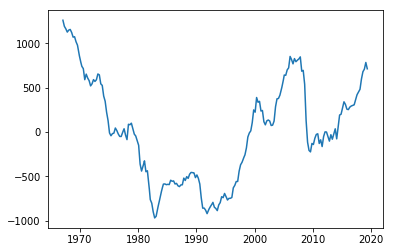

In [47]:
plt.plot(econ_master["MonthID"], econ_master["GDP_detrended"])

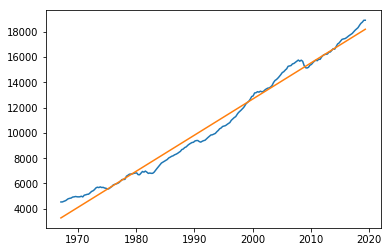

In [154]:
plt.plot(econ_master["MonthID"], econ_master["GDP"].interpolate("linear"))
pred = detrender(econ_master["GDP"].interpolate("linear"), econ_master["MonthID"])
plt.plot(econ_master["MonthID"], pred)

In [48]:
econ_master.to_csv("../data/Econ/EconOriginal/econ_master.csv")